# Scripting sequential manual warps

The **mwarp1d** GUI supports sequential manual warps for arbitrarily fine control over local warping effects. This control is replicated in the **SequentialManualWarp** class, as demonstrated below.

In [1]:
%matplotlib inline

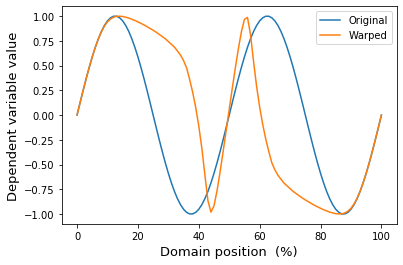

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import mwarp1d


#define first warp:
Q     = 101                      #domain size
warp0 = mwarp1d.ManualWarp1D(Q)  #constrained Gaussian kernel warp object
warp0.set_center(0.10)           #relative warp center (0 to 1)
warp0.set_amp(0.3)               #relative warp amplitude (-1 to 1)
warp0.set_head(0.0)              #relative warp head (0 to 1)
warp0.set_tail(0.0)              #relative warp tail (0 to 1)

#define second warp:
warp1 = mwarp1d.ManualWarp1D(Q)
warp1.set_center(0.90)
warp1.set_amp(-0.3)
warp1.set_head(0.0)
warp1.set_tail(0.0)

#create and apply sequential warps
seq   = mwarp1d.SequentialManualWarp()
seq.append( warp0 )
seq.append( warp1 )
y     = np.sin( np.linspace(0, 4*np.pi, Q) )  #an arbitary 1D observation
yw    = seq.apply_warp_sequence(y)            #sequentially warped 1D observation

#plot:
plt.figure()
ax = plt.axes()
ax.plot(y, label='Original')
ax.plot(yw, label='Warped')
ax.legend()
ax.set_xlabel('Domain position  (%)', size=13)
ax.set_ylabel('Dependent variable value', size=13)
plt.show()

Individual warps can be accessed and applied individually like this:

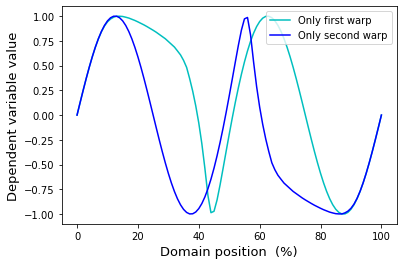

In [3]:
w0    = seq.warps[0]
w1    = seq.warps[1]

yw0   = w0.apply_warp(y)
yw1   = w1.apply_warp(y)
yw01  = w1.apply_warp(yw0)

#plot:
plt.figure()
ax = plt.axes()
ax.plot(yw0,  'c', label='Only first warp')
ax.plot(yw1,  'b', label='Only second warp')
# ax.plot(yw01, 'orange', label='Sequentially warped')
ax.legend()
ax.set_xlabel('Domain position  (%)', size=13)
ax.set_ylabel('Dependent variable value', size=13)
plt.show()

The main value of the **SequentialManualWarp** class is to apply manual warps (that were constructed in the GUI) to other data. For example, if the original data represent the time series of a three-component force vector, and if the warps were created using only the X component time series, then the **SequentialManualWarp** class can be used to apply those warps to the Y and Z components. This is demonstrated in the "Applying GUI warps" example.